# Data-driven heart disease analysis project

# DATA LOADING AND OVERVIEW

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Load the dataset
Loading and Inspecting the Data The first step in data preprocessing is to load the dataset and explore its structure. This includes checking the column names, data types, the number of rows and columns, and getting a general idea of the data using .info() and .head(). This step helps identify which columns are numerical, categorical, or encoded in a way that needs decoding.

In [3]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [6]:
df.dtypes   

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [7]:
df.size

4158

In [8]:
df.shape

(297, 14)

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


# DATA CLEANING AND PREPROCESSING

# Checking for Missing or Abnormal Values
We then check for missing values using .isnull().sum() to ensure the dataset is complete. Even if no values are missing, we also inspect each column for outliers or abnormal entries (e.g., a cholesterol value of 0 or heart rate of 300, which are unrealistic). If abnormalities are found, we can either remove the affected rows, fill them using median values, or investigate further.

In [10]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [11]:
df.duplicated().sum()

0

## No Duplicate and Null Value is present in the dataset

# Checking if some other irrelevant value present in dataset

In [12]:

df['condition'].value_counts()


condition
0    160
1    137
Name: count, dtype: int64

In [13]:
df['sex'].value_counts()

sex
1    201
0     96
Name: count, dtype: int64

# Rename columns
Most medical datasets use abbreviations or short codes like cp, fbs, thalach, etc., which can be unclear to someone unfamiliar with the domain. These should be renamed to more descriptive names, such as:

In [14]:
df.rename(columns={
    'sex': 'gender',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_vessels',
    'thal': 'thalassemia',
    'condition': 'heart_disease'
}, inplace=True)

# Convert categorical variables to readable labels
Converting Encoded Categorical Data to Meaningful Labels Some categorical variables are stored as numbers. For example:
sex: 0 = female, 1 = male
cp: 0 = typical angina, 1 = atypical angina, etc.
target: 0 = no heart disease, 1 = heart disease
These numerical codes should be converted to human-readable labels after correlation and modeling, but before visualization. This helps make plots and insights more understandable without losing analytical value early in the process.

In [15]:
df['gender'] = df['gender'].astype(int)  # Ensure numeric type before mapping
df['gender'] = df['gender'].map({0: 'Female', 1: 'Male'}) # Changing 0 to Female and 1 to Male

In [16]:
df['chest_pain_type'] = df['chest_pain_type'].map({
    0: 'Typical Angina',
    1: 'Atypical Angina',
    2: 'Non-anginal Pain',
    3: 'Asymptomatic'
})

In [17]:
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({0: '≤ 120 mg/dl', 1: '> 120 mg/dl'})

In [18]:
df['exercise_angina'] = df['exercise_angina'].map({0: 'No', 1: 'Yes'})

In [19]:
df['heart_disease'] = df['heart_disease'].map({0: 'No Disease', 1: 'Disease'})

# CHECKING CLEANED DATASET

In [20]:
df.head(100)

,age,gender,chest_pain_type,resting_bp,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_vessels,thalassemia,heart_disease
0,69,Male,Typical Angina,160,234,> 120 mg/dl,2,131,No,0.1,1,1,0,No Disease
1,69,Female,Typical Angina,140,239,≤ 120 mg/dl,0,151,No,1.8,0,2,0,No Disease
2,66,Female,Typical Angina,150,226,≤ 120 mg/dl,0,114,No,2.6,2,0,0,No Disease
3,65,Male,Typical Angina,138,282,> 120 mg/dl,2,174,No,1.4,1,1,0,Disease
4,64,Male,Typical Angina,110,211,≤ 120 mg/dl,2,144,Yes,1.8,1,0,0,No Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,60,Female,Non-anginal Pain,120,178,> 120 mg/dl,0,96,No,0.0,0,0,0,No Disease
96,59,Male,Non-anginal Pain,126,218,> 120 mg/dl,0,134,No,2.2,1,1,1,Disease
97,59,Male,Non-anginal Pain,150,212,> 120 mg/dl,0,157,No,1.6,0,0,0,No Disease
98,58,Male,Non-anginal Pain,112,230,≤ 120 mg/dl,2,165,No,2.5,1,1,2,Disease


# DATA VISUALIZATION

# Count plot for target variable
In this dataset, the target column is our output variable, also known as the dependent variable or label.

It represents the presence or absence of heart disease in each patient:

 No heart disease
 Heart disease present

This is the key variable we are trying to understand, analyze, or predict. All other columns (like age, cholesterol, chest pain, etc.) are input features that might influence or help explain the target.

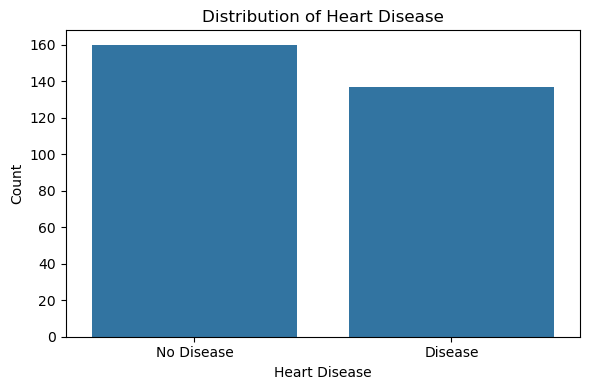

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='heart_disease')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [22]:
df['heart_disease'].value_counts(normalize=True) * 100

heart_disease
No Disease    53.872054
Disease       46.127946
Name: proportion, dtype: float64

# Interpretation
This plot shows how many patients in the dataset have heart disease versus how many do not.
And this shows that 53.87% have No heart disease whereas 46.12% have Heart disease.

# KDE Plot for Age distribution by Heart Disease status

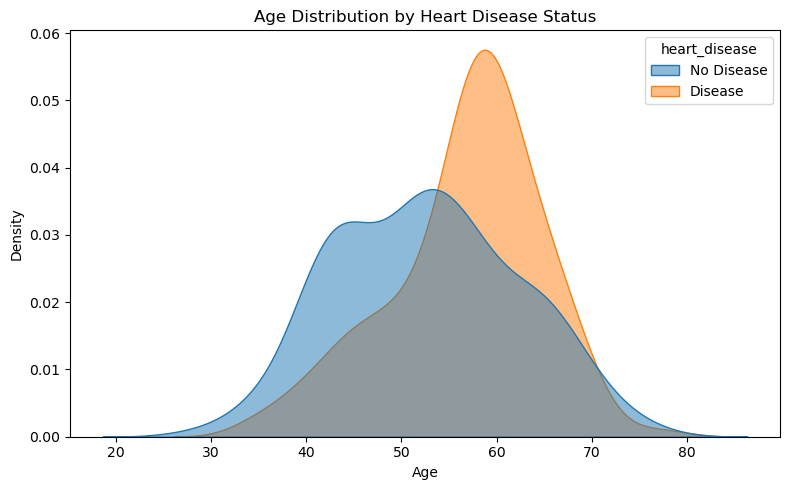

In [23]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='age', hue='heart_disease', fill=True, common_norm=False, alpha=0.5)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Box Plot: Max Heart Rate by Heart Disease

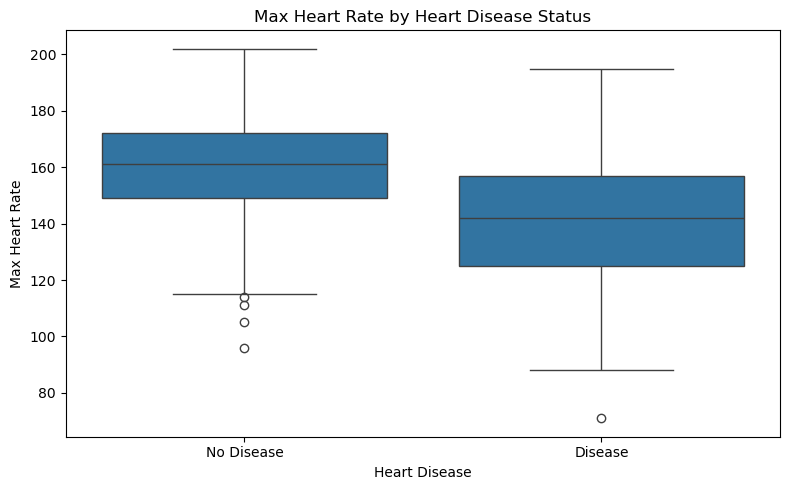

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='heart_disease', y='max_heart_rate')
plt.title('Max Heart Rate by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Max Heart Rate')
plt.tight_layout()
plt.show()

# Pair Plot of Selected Features

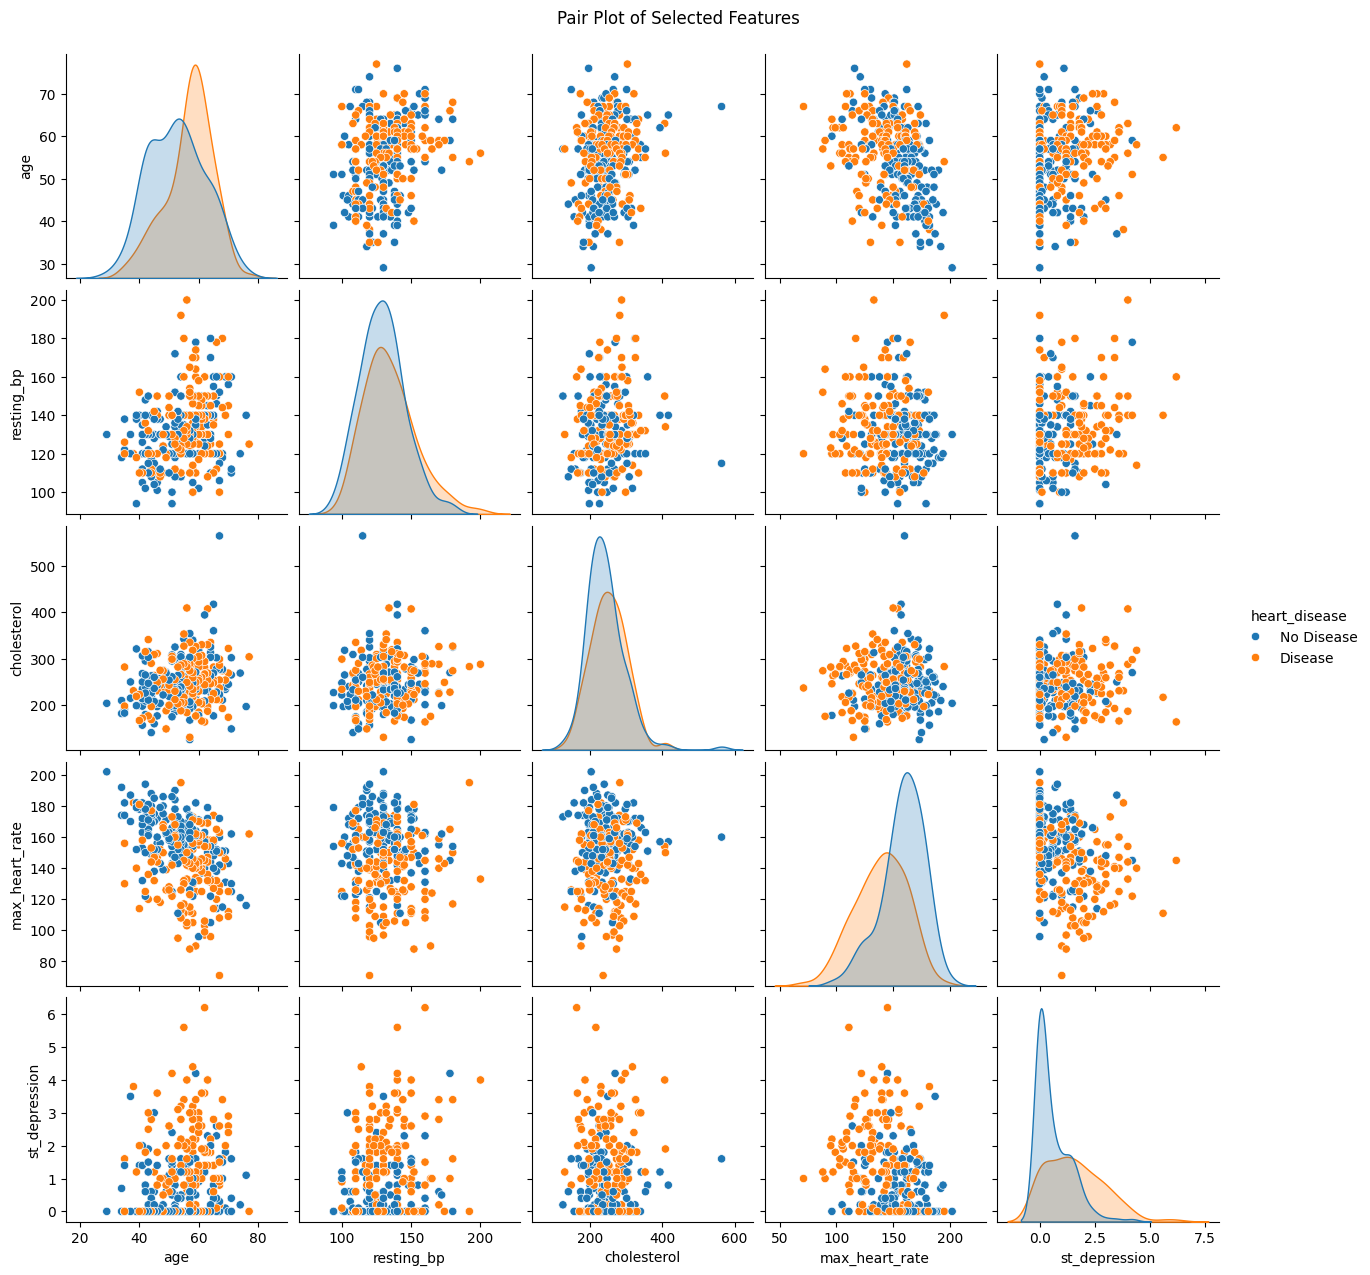

In [31]:
selected_features = ['age', 'resting_bp', 'cholesterol', 'max_heart_rate', 'st_depression', 'heart_disease']
sns.pairplot(df[selected_features], hue='heart_disease')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Correlation Heatmap

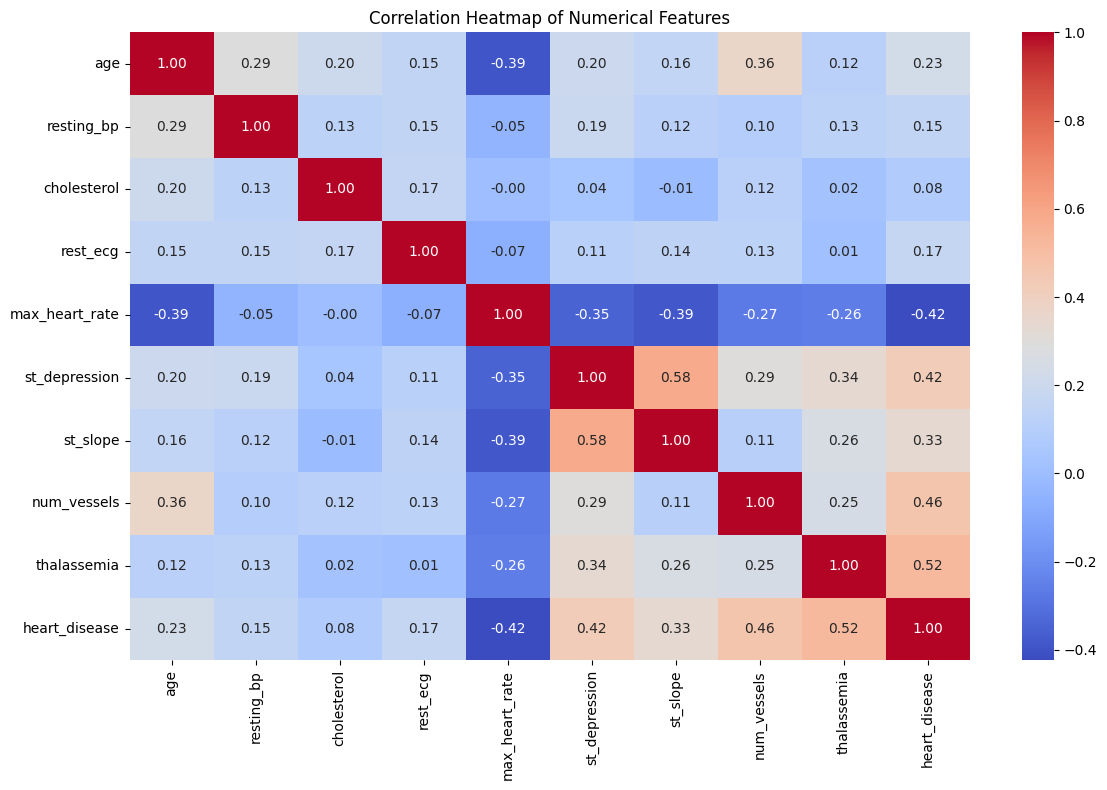

In [32]:
df_corr = df.copy()
df_corr['heart_disease'] = df_corr['heart_disease'].map({'No Disease': 0, 'Disease': 1})

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Grouped Cholesterol Analysis

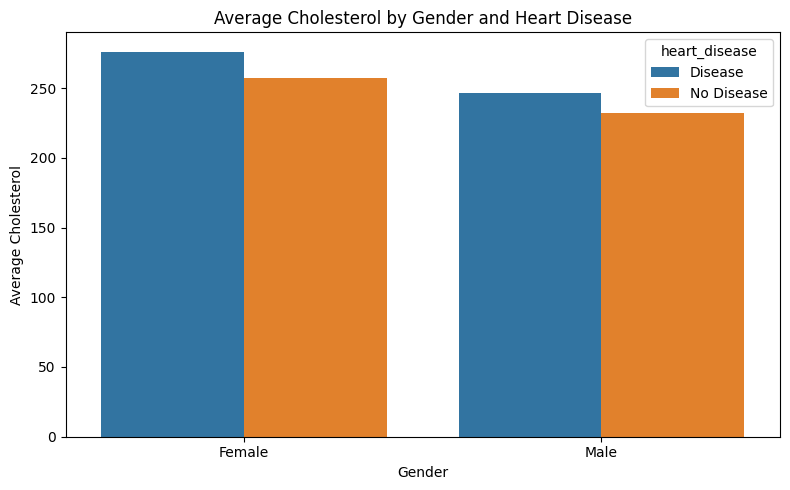

In [34]:
grouped_chol = df.groupby(['gender', 'heart_disease'])['cholesterol'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_chol, x='gender', y='cholesterol', hue='heart_disease')
plt.title("Average Cholesterol by Gender and Heart Disease")
plt.xlabel("Gender")
plt.ylabel("Average Cholesterol")
plt.tight_layout()
plt.show()

# Exploratory Data Analysis
Exploratory Data Analysis helps us understand patterns, spot anomalies, and identify relationships in the dataset

# QUESTIONS TO EXPLORE
- What factors (age, gender, cholesterol, etc.) are associated with heart disease?
- Is there a significant difference in heart disease presence between male and female patients?
- Does maximum heart rate (thalach) differ by age group or disease status?
- Is fasting blood sugar related to heart condition?
- What is the relationship between chest pain type and heart disease risk?

## 1.What factors (age, gender, cholesterol, etc.) are associated with heart disease?
Approach:
Exploring numeric correlations using a heatmap

box plots for continuous variables (e.g. age, cholesterol)

count plots for categorical variables (e.g. gender)

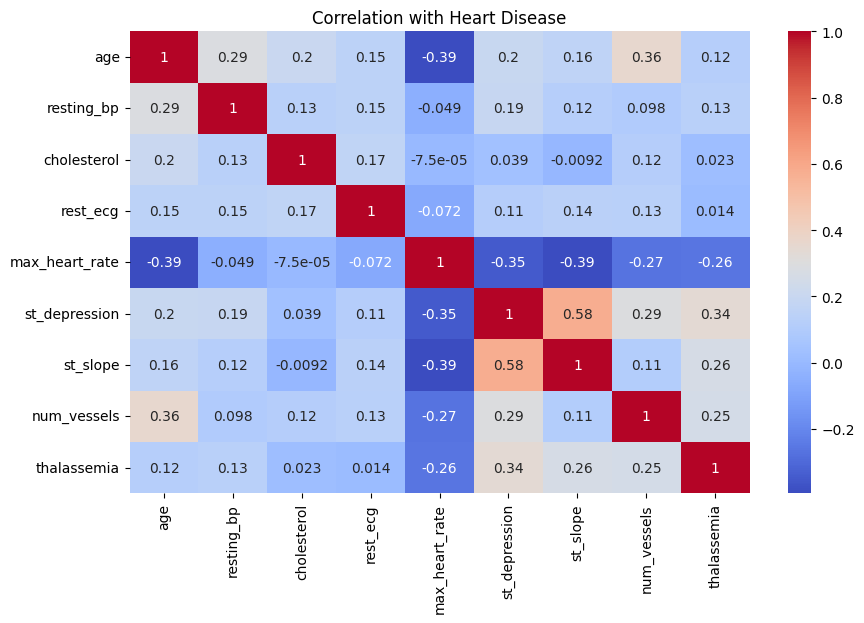

In [39]:
# Heatmap for numeric correlations 
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation with Heart Disease')
plt.show()

## box plots for continuous variables (e.g. age, cholesterol, max heart rate)

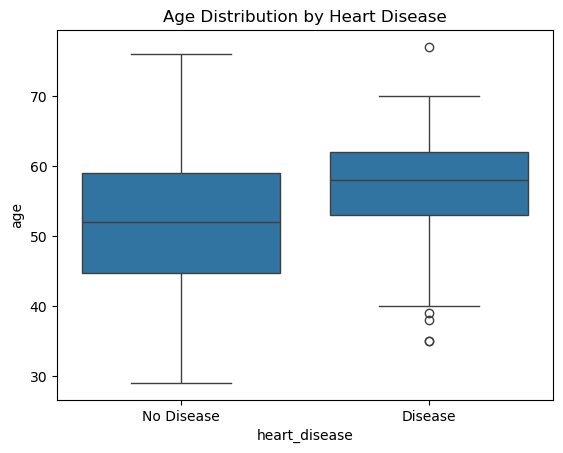

In [25]:
#  Age vs Heart Disease (Box Plot)
sns.boxplot(x='heart_disease', y='age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.show()

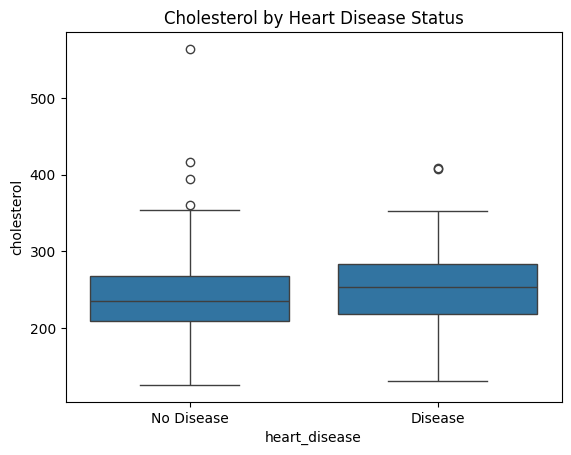

In [52]:
# Cholesterol vs Heart Disease (Box Plot)

sns.boxplot(x='heart_disease', y='cholesterol', data=df)
plt.title('Cholesterol by Heart Disease Status')
plt.show()

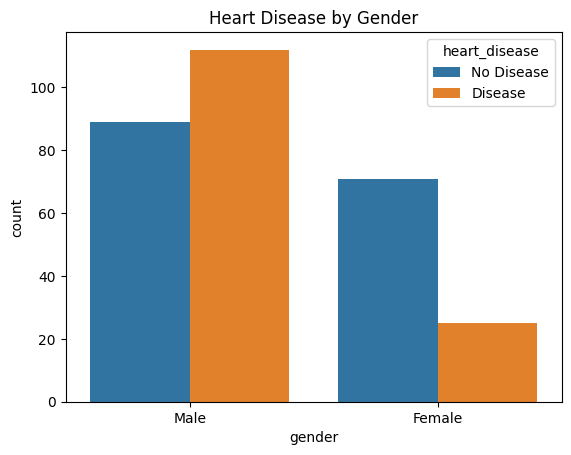

In [53]:
# Gender vs Heart Disease (Count Plot)
sns.countplot(x='gender', hue='heart_disease', data=df)
plt.title('Heart Disease by Gender')
plt.show()

In [55]:
pd.crosstab(df['gender'], df['heart_disease'], normalize='index') * 100


heart_disease,Disease,No Disease
gender,,
Female,26.041667,73.958333
Male,55.721393,44.278607


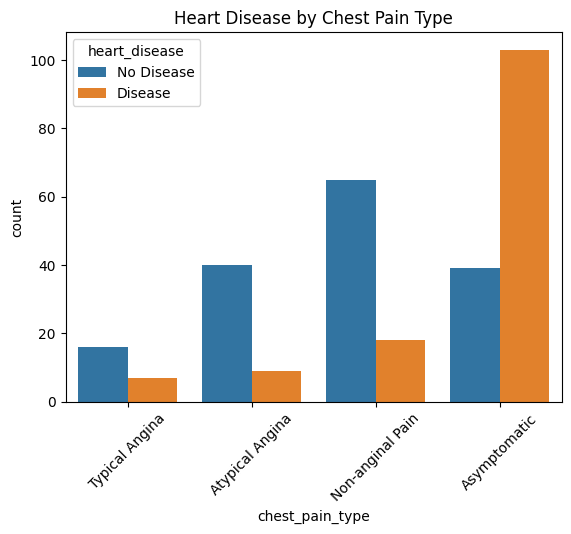

In [62]:
# Chest Pain Type vs Heart Disease
sns.countplot(x='chest_pain_type', hue='heart_disease', data=df)
plt.title('Heart Disease by Chest Pain Type')
plt.xticks(rotation=45)
plt.show()

## 2.Is there a difference between male and female patients?

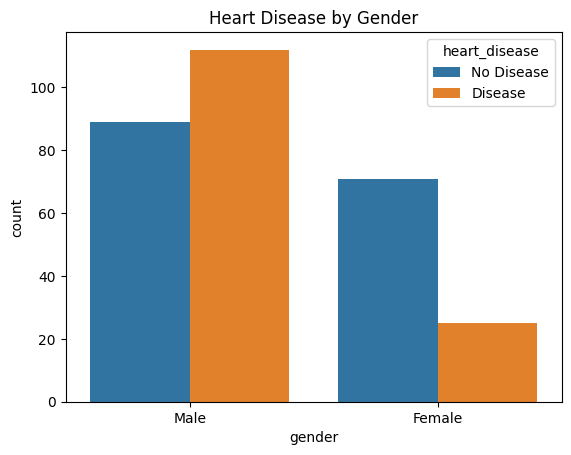

In [40]:
sns.countplot(x='gender', hue='heart_disease', data=df)
plt.title('Heart Disease by Gender')
plt.show()

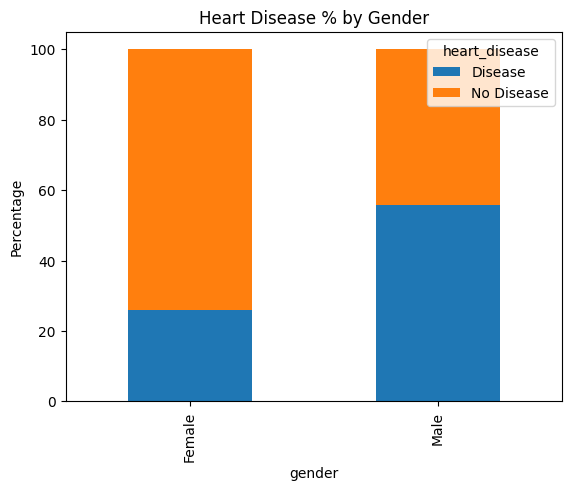

In [41]:
gender_hd = pd.crosstab(df['gender'], df['heart_disease'], normalize='index') * 100
gender_hd.plot(kind='bar', stacked=True)
plt.title('Heart Disease % by Gender')
plt.ylabel('Percentage')
plt.show()


## 3. Does max heart rate differ by age or disease status?

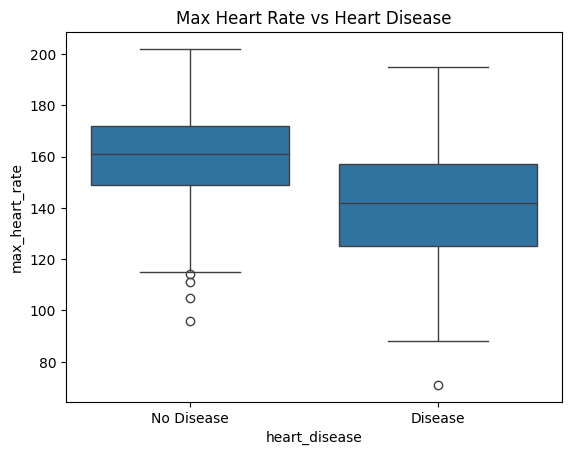

In [42]:
sns.boxplot(x='heart_disease', y='max_heart_rate', data=df)
plt.title('Max Heart Rate vs Heart Disease')
plt.show()


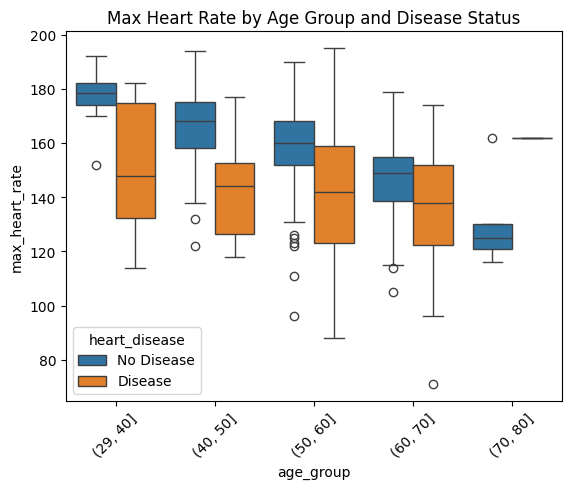

In [43]:
df['age_group'] = pd.cut(df['age'], bins=[29, 40, 50, 60, 70, 80])
sns.boxplot(x='age_group', y='max_heart_rate', hue='heart_disease', data=df)
plt.xticks(rotation=45)
plt.title('Max Heart Rate by Age Group and Disease Status')
plt.show()


## 4.Is fasting blood sugar related to heart disease?

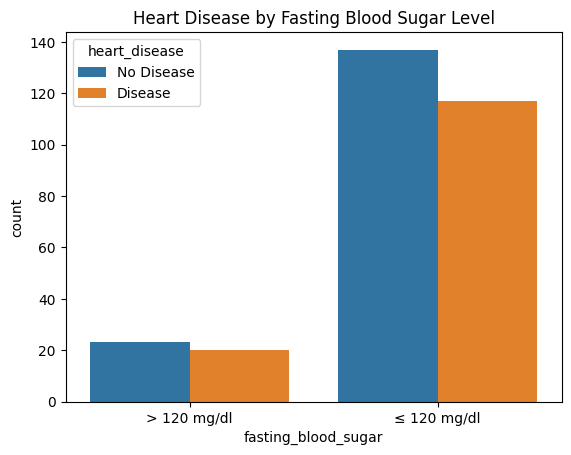

In [45]:
sns.countplot(x='fasting_blood_sugar', hue='heart_disease', data=df)
plt.title('Heart Disease by Fasting Blood Sugar Level')
plt.show()

## 5. What is the relationship between chest pain type and heart disease?

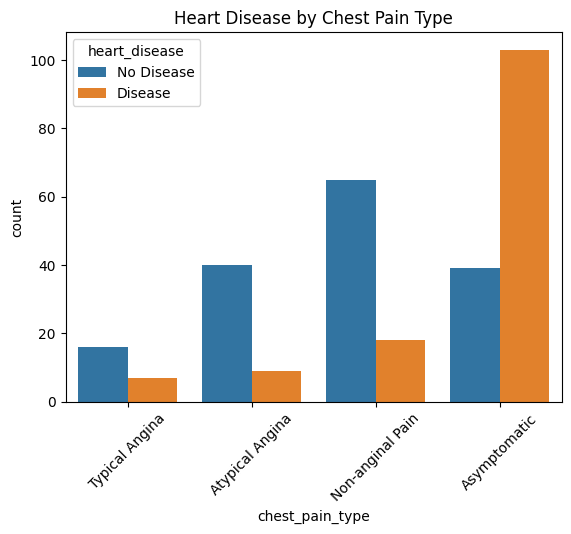

In [46]:
sns.countplot(x='chest_pain_type', hue='heart_disease', data=df)
plt.title('Heart Disease by Chest Pain Type')
plt.xticks(rotation=45)
plt.show()

In [67]:
# First, create a normalized crosstab to get percentage distribution
chest_pain_percent = pd.crosstab(df['chest_pain_type'], df['heart_disease'], normalize='index') * 100

# Display the result
print(chest_pain_percent.round(2))


heart_disease     Disease  No Disease
chest_pain_type                      
Asymptomatic        72.54       27.46
Atypical Angina     18.37       81.63
Non-anginal Pain    21.69       78.31
Typical Angina      30.43       69.57


# KEY INSIGHTS

## Q1: What factors (age, gender, cholesterol, etc.) are associated with heart disease?
Age:
The age distribution shows that most heart disease patients fall between 40–60 years, peaking around 50–55. This suggests that middle-aged individuals are at greater risk of developing heart conditions. Aging likely contributes to cardiovascular stress, which elevates risk.

Gender:
The gender distribution indicates that more males than females are present in the heart disease group. This implies a higher susceptibility or diagnosis rate among men. It could reflect both biological vulnerability and differences in healthcare-seeking behavior.

Cholesterol:
While cholesterol levels mostly fall in the 150–300 mg/dL range, there is no strong standalone correlation between high cholesterol and heart disease in the dataset. This suggests cholesterol must be interpreted in combination with other risk factors like chest pain or ECG results.

Chest Pain Type:
Patients with asymptomatic chest pain (Type 3) are more frequently diagnosed with heart disease, despite not feeling classic symptoms. This is critical because it shows that lack of pain doesn't mean lack of disease—highlighting the importance of screening.

Max Heart Rate (thalach):
Individuals with heart disease tend to have lower max heart rates, possibly due to reduced cardiac capacity or ischemia. This shows that max heart rate is a strong indicator of heart health.

Exercise-Induced Angina:
Patients experiencing angina during exercise are more likely to have heart disease, suggesting that exercise-triggered chest pain is a major red flag.

ST Depression (oldpeak):
Higher oldpeak values—indicating greater ST depression during stress tests—are strongly associated with heart disease. This supports the idea that ECG changes under stress are key diagnostic signals.

ST Slope:
A downsloping ST segment is frequently found in patients with heart disease. This is a classic ECG finding associated with myocardial ischemia.

Fasting Blood Sugar:
There appears to be no significant relationship between fasting blood sugar >120 mg/dL and heart disease status, suggesting that in this dataset, blood sugar is not a strong predictive factor.

##  Q2: Is there a significant difference in heart disease presence between male and female patients?
Answer:
Yes. Visual analysis shows that males have a higher rate of heart disease than females in this dataset. It aligns with broader epidemiological data suggesting men are at greater cardiovascular risk, especially before menopause in women. This difference is important for gender-specific screening and preventive strategies.

## Q3: Does maximum heart rate (thalach) differ by age group or disease status?
Answer:
Yes. Patients with heart disease generally show a lower maximum heart rate than those without it. Since maximum heart rate tends to decline with age naturally, it’s important to note that younger, healthier individuals achieve higher rates during stress tests, while heart disease patients may struggle to reach expected levels, indicating compromised cardiac function.

This metric helps in evaluating exercise tolerance and cardiovascular efficiency, especially when analyzed along with age.

## Q4: Is fasting blood sugar related to heart condition?
Answer:
Based on the visualization, fasting blood sugar >120 mg/dL does not significantly correlate with heart disease presence in this dataset. The distribution of patients with elevated blood sugar is fairly even between those with and without disease.

While high fasting blood sugar is a known risk factor in broader medical literature (e.g., linked to diabetes and metabolic syndrome), in your dataset, it does not appear to be a strong standalone predictor.

## Q5: What is the relationship between chest pain type and heart disease risk?
Answer:
There is a strong relationship between chest pain type and heart disease:

Asymptomatic (Type 3) chest pain has the strongest association with heart disease. This is particularly concerning because these patients do not experience classic warning symptoms.

In contrast, Typical Angina (Type 0), although common, is less predictive of heart disease in your dataset.

This reveals the critical importance of screening individuals with non-classic or no symptoms—especially those with risk factors like abnormal ECG or low max heart rate.

# Summary
Visual analysis of the heart disease dataset reveals several important patterns. Middle-aged individuals, particularly those aged 40 to 60, are most commonly affected, suggesting higher vulnerability during these years. Males appear more frequently in the dataset and also show a higher incidence of heart disease, indicating a potential gender disparity in risk. Chest pain type is strongly associated with heart disease—especially the asymptomatic type, which is frequently linked to positive diagnoses despite the absence of symptoms. Cholesterol levels mostly fall within normal ranges and do not clearly distinguish between diseased and non-diseased patients, implying limited predictive power on their own. Patients with heart disease tend to have lower maximum heart rates, suggesting reduced cardiovascular performance. Exercise-induced angina, ST depression during stress (oldpeak), and a downsloping ST segment are all strongly associated with heart disease, reinforcing their diagnostic importance. In contrast, fasting blood sugar levels do not show a significant difference between those with and without heart disease, indicating it may not be a key factor in this dataset.